# Full Tutorial Notebook

## Package Imports

In [1]:
!python -m pip uninstall be_scan --yes
!python -m pip install git+https://github.com/liaulab/be-scan.git@simple_version

Found existing installation: be_scan 0.0.2
Uninstalling be_scan-0.0.2:
  Successfully uninstalled be_scan-0.0.2
  Cloning https://github.com/liaulab/be-scan.git (to revision simple_version) to /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-3zg8pi6u
  Running command git clone --filter=blob:none --quiet https://github.com/liaulab/be-scan.git /private/var/folders/zg/n1xk_ddd26n29rcnygly3q0c0000gn/T/pip-req-build-3zg8pi6u
  Running command git checkout -b simple_version --track origin/simple_version
  Switched to a new branch 'simple_version'
  branch 'simple_version' set up to track 'origin/simple_version'.
  Resolved https://github.com/liaulab/be-scan.git to commit 0541bdb4adeb3300946e5e5d5bf18cf487cca9f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for be_scan: filename=be_scan-0.0.2-py3-none-any.whl size=61595 sha256=b9877c1632fd40da1f04160f42593ca5a985b270

In [2]:
import warnings
warnings.filterwarnings('ignore')
import be_scan

## be_scan.sgrna Function Calls

In [3]:
from be_scan.sgrna import *
sgrna_dir = "../../../tests/test_data/sgrna/"

### Function 1 be_scan.sgrna.generate_library()

In [4]:
guides = generate_library(
    gene_filepath  = f"{sgrna_dir}230408_AR_Input.fasta", # filepath to gene .fasta
    gene_name      = "AR", 
    cas_type       = "SpG", 
    output_name    = "CBE_guides.csv", 
    edit_from = "C", edit_to = "T", 
    exclude_introns = False, exclude_nonediting = False, 
    exclude_duplicates = True, exclude_sequences = ['TTTT'], 
    )
guides.head(5)

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated


,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene
0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR
1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR
2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR
3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR
4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,sense,plus,AR


### Function 2 be_scan.sgrna.annotate()

In [5]:
annotated_guides = annotate(
    guides_file      = "CBE_guides.csv",
    protein_filepath = f"{sgrna_dir}P10275.fasta", # this can also be left empty
    output_name      = 'CBE_annotated.csv',
    edit_from = "C", edit_to = "T",
    exclude_duplicates = True, 
    )
annotated_guides.head(5)

Guides annotated for C to T.


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR,Intron,0,None,None,Intron
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR,Intron,0,None,None,Intron
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR,Intron,0,None,None,Intron
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR,Intron,0,None,None,Intron
4,sgRNA_4,aagctcaaggATGGAAGTGC,AGT,2,-1,67545137,0,-1,-1,aagctcaaggATGGAAGTGC,sense,plus,AR,Intron,0,None,None,Intron


### Function 3 be_scan.sgrna.reference_check()

This function takes about a minute to run independent of library size. 
This step is not necessary and can be skipped. 

In [ ]:
# Optional download reference genome

! wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
! gunzip hg38.fa.gz

In [7]:
checked_guides = reference_check(
    guides_file  = "CBE_annotated.csv", # file generated from previous step
    genome_file  = f"{sgrna_dir}hg38_short.fa",
    output_name  = 'CBE_filtered.csv',
    )
checked_guides.head(5)

5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome


,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,sgRNA_strand,gene_strand,gene,CtoT_win_overlap,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,sense,plus,AR,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,antisense,plus,AR,Intron,2,M1I/E2K;E2K;M1I,Missense/Missense;Missense;Missense,Missense,0


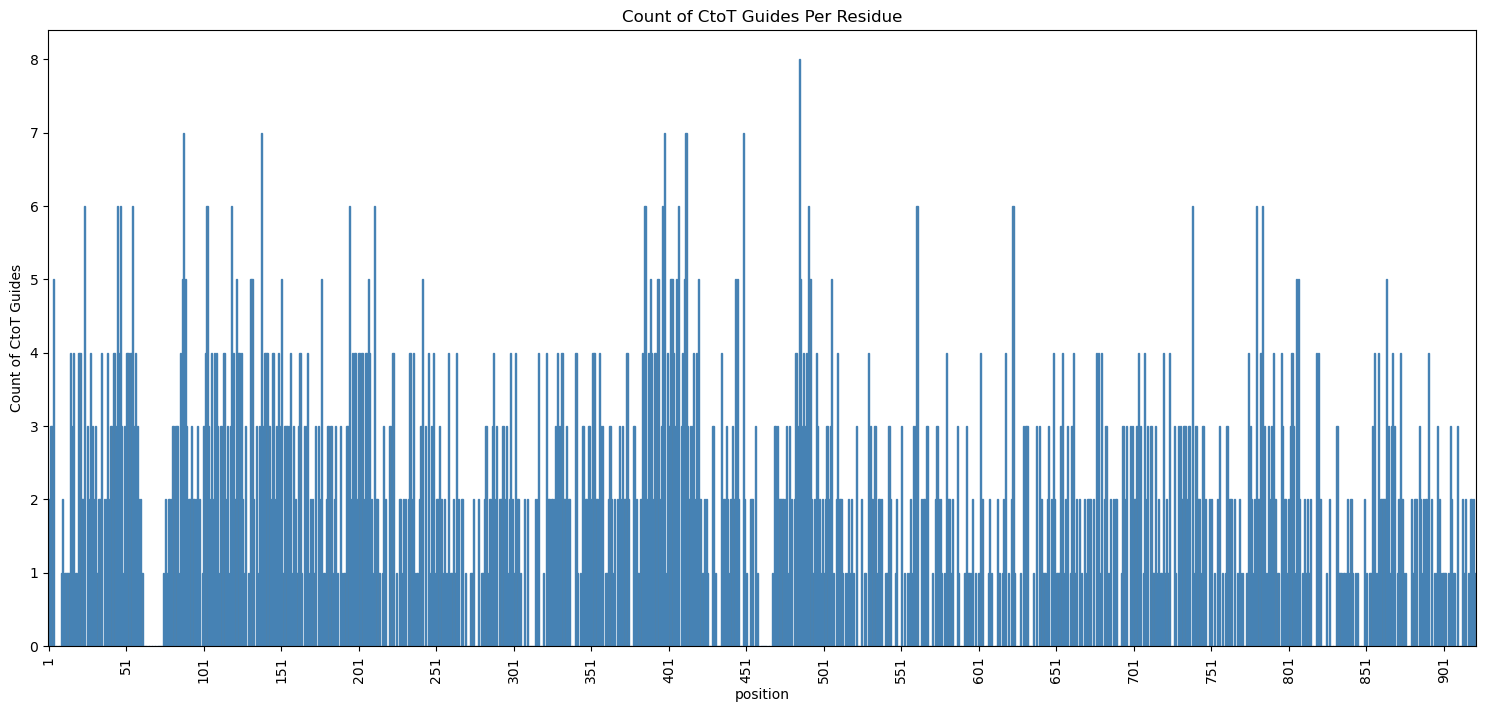

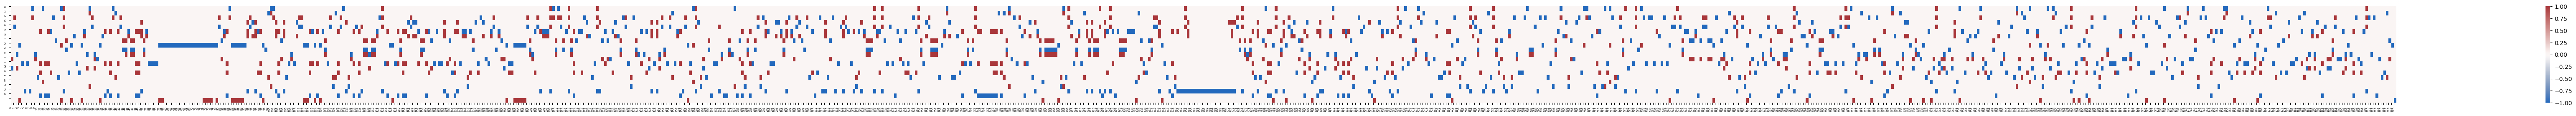

In [10]:
_ = coverage_plots(
    annotated_guides  = "CBE_filtered.csv", 
    protein_filepath  = f"{sgrna_dir}P10275.fasta", 
    edit_from = "C", edit_to = "T",
)

### Function 1-4 Combined be_scan.sgrna.design_library()

Create gene object from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful!
Guides generated and duplicates removed
1595 guides were generated
Guides annotated for A to G.
Guides annotated for C to T.
Guides annotated for AC to GT.
5962 lines processed from ../../../tests/test_data/sgrna/hg38_short.fa
Guides checked against reference genome
0 guides out of 1595 occurred more than once in the reference genome
Complete! Library generated from ../../../tests/test_data/sgrna/230408_AR_Input.fasta
Index(['sgRNA_ID', 'sgRNA_seq', 'PAM_seq', 'starting_frame', 'gene_pos',
       'chr_pos', 'exon', 'windowstart_pos', 'windowend_pos', 'coding_seq',
       'sgRNA_strand', 'gene_strand', 'gene', 'AtoG_win_overlap', 'A_count',
       'AtoG_mutations', 'AtoG_muttypes', 'AtoG_muttype', 'CtoT_win_overlap',
       'C_count', 'CtoT_mutations', 'CtoT_muttypes', 'CtoT_muttype',
       'ACtoGT_win_overlap', 'AC_count', 'ACtoGT_mutations', 'ACtoGT_mutty

,sgRNA_ID,sgRNA_seq,PAM_seq,starting_frame,gene_pos,chr_pos,exon,windowstart_pos,windowend_pos,coding_seq,...,C_count,CtoT_mutations,CtoT_muttypes,CtoT_muttype,ACtoGT_win_overlap,AC_count,ACtoGT_mutations,ACtoGT_muttypes,ACtoGT_muttype,ref_occurrences
0,sgRNA_0,gattcagccaagctcaaggA,TGG,2,-1,67545128,0,-1,-1,gattcagccaagctcaaggA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
1,sgRNA_1,attcagccaagctcaaggAT,GGA,0,-1,67545129,0,-1,-1,attcagccaagctcaaggAT,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
2,sgRNA_2,cagccaagctcaaggATGGA,AGT,0,-1,67545132,0,-1,-1,cagccaagctcaaggATGGA,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
3,sgRNA_3,gccaagctcaaggATGGAAG,TGC,2,-1,67545134,0,-1,-1,gccaagctcaaggATGGAAG,...,0,NaN,NaN,Intron,Intron,0,NaN,NaN,Intron,0
4,sgRNA_787,CTTCCATccttgagcttggc,tga,0,6,67545153,0,3,-1,gccaagctcaaggATGGAAG,...,2,M1I/E2K;E2K;M1I,Missense/Missense;Missense;Missense,Missense,Intron,3,M1T/E2K;M1I/E2K;E2K;M1I;M1T,Missense/Missense;Missense/Missense;Missense;M...,Missense,0


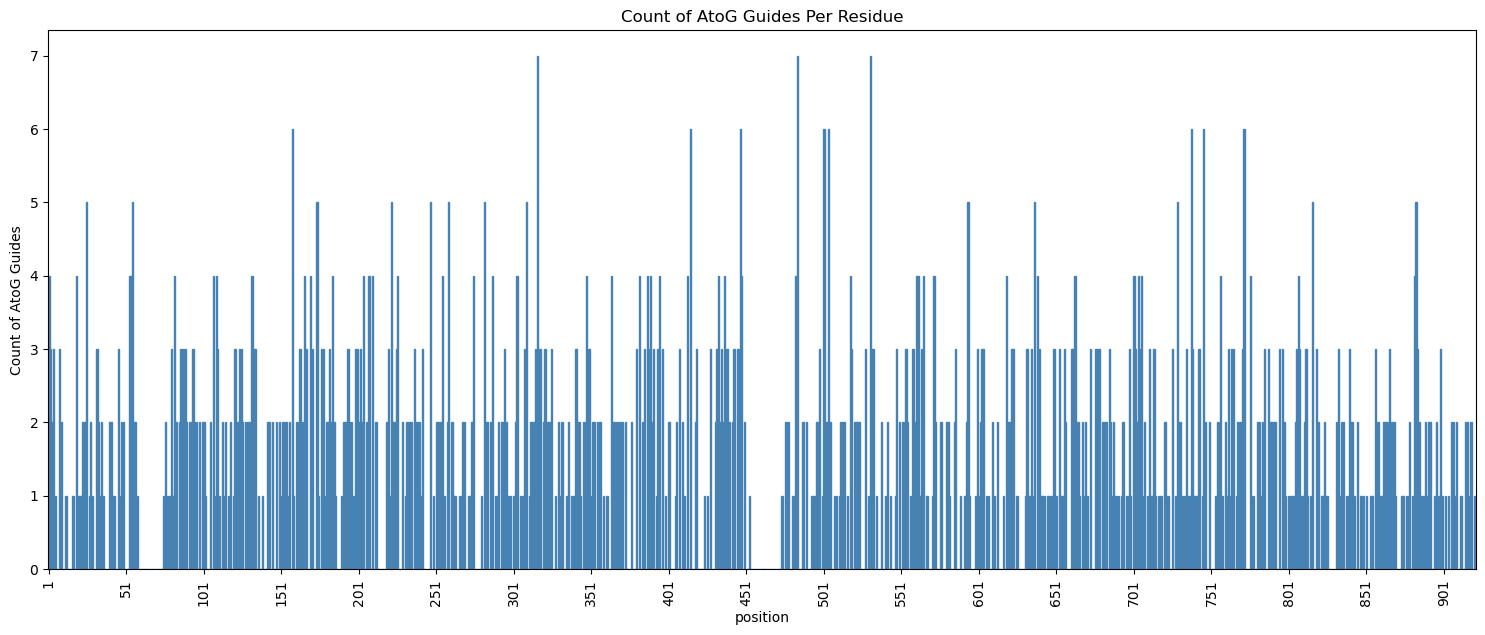

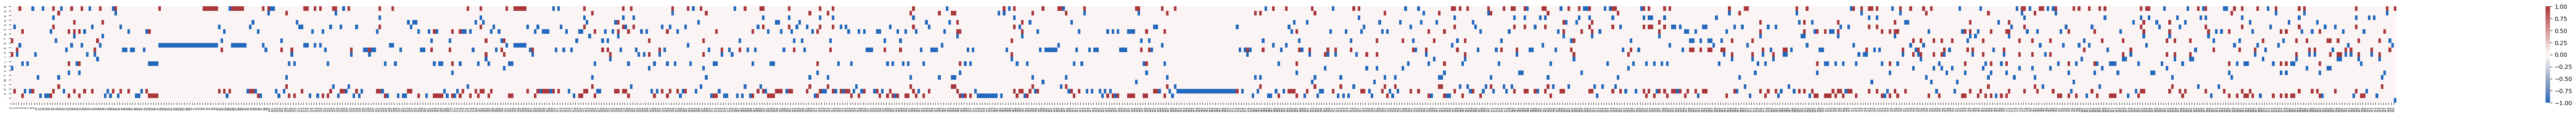

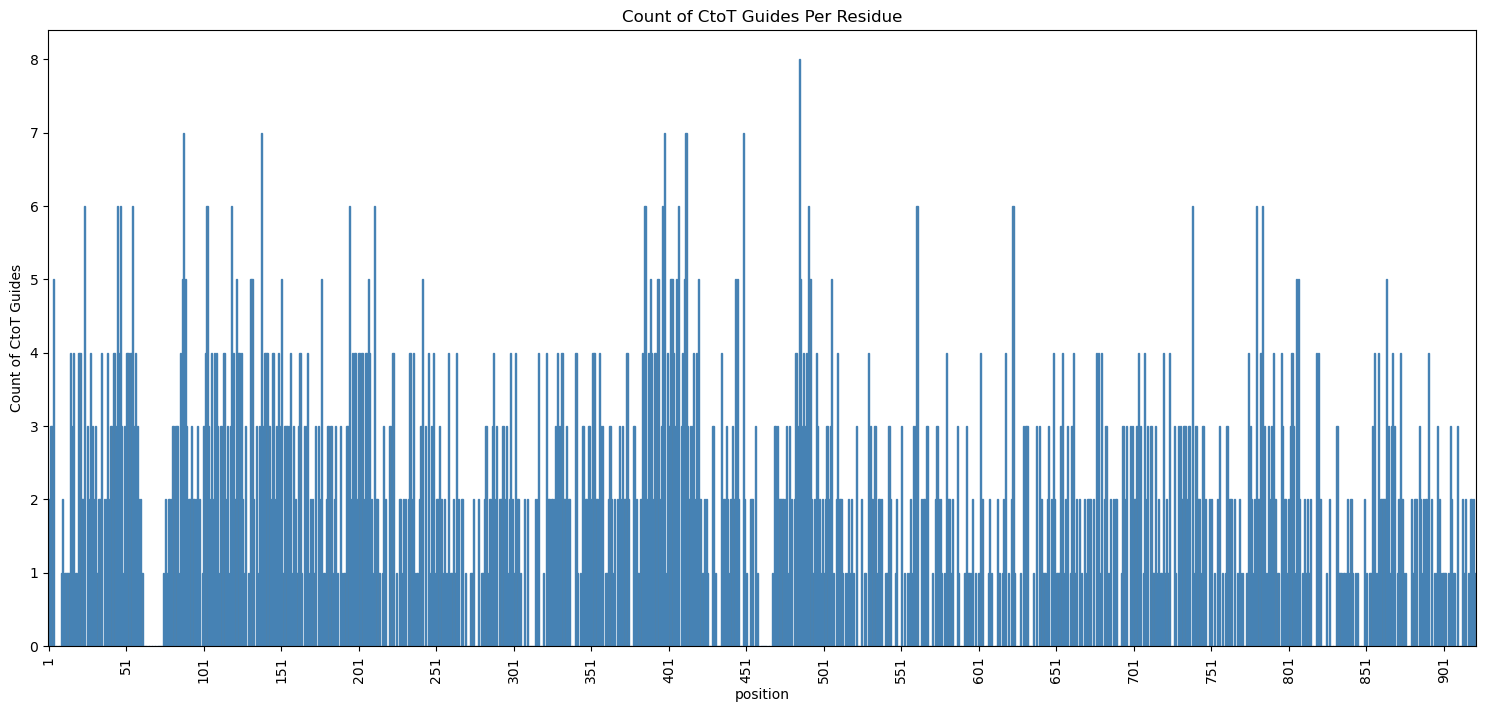

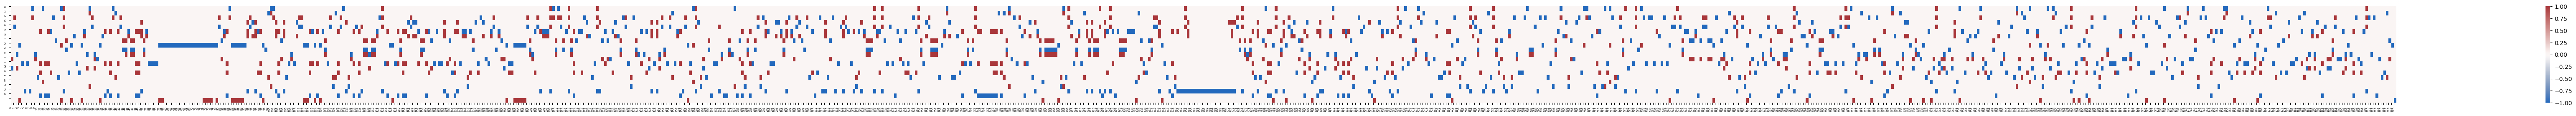

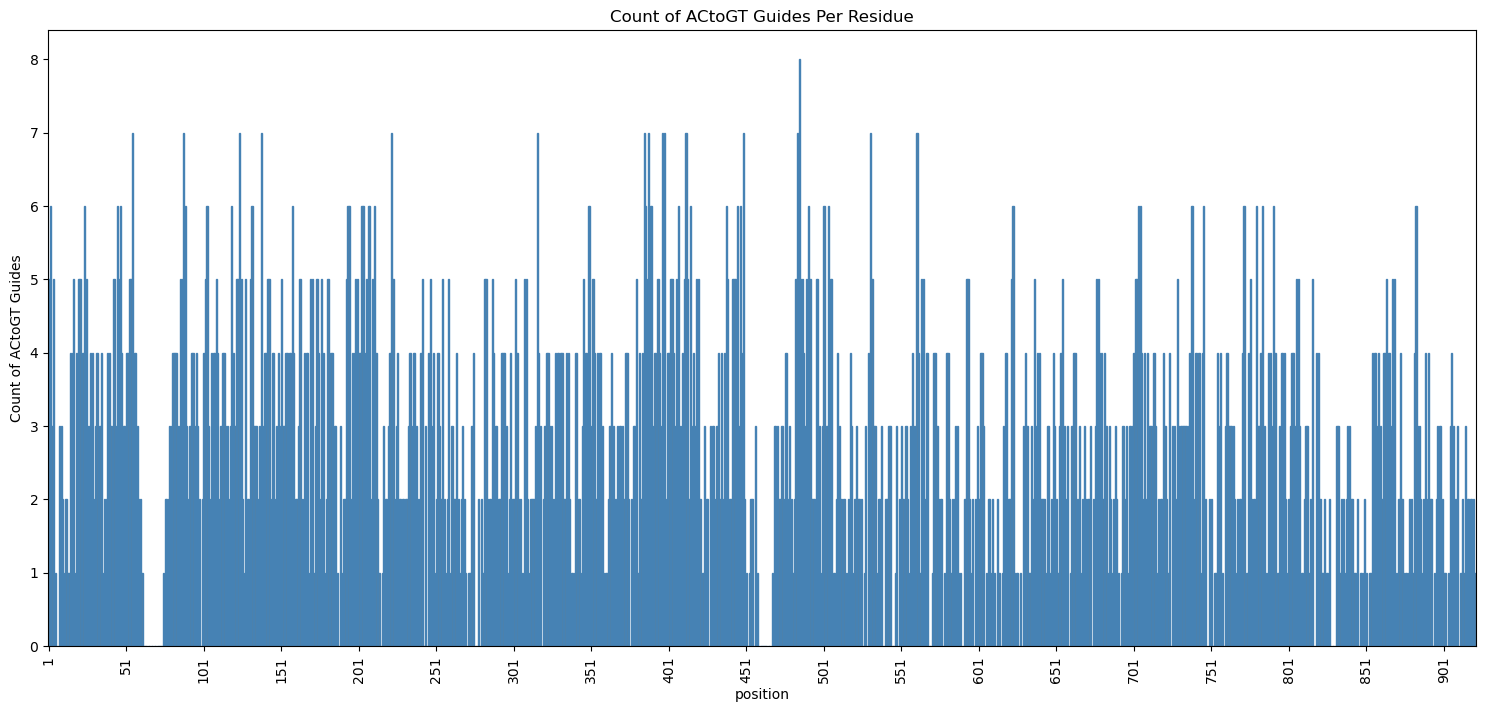

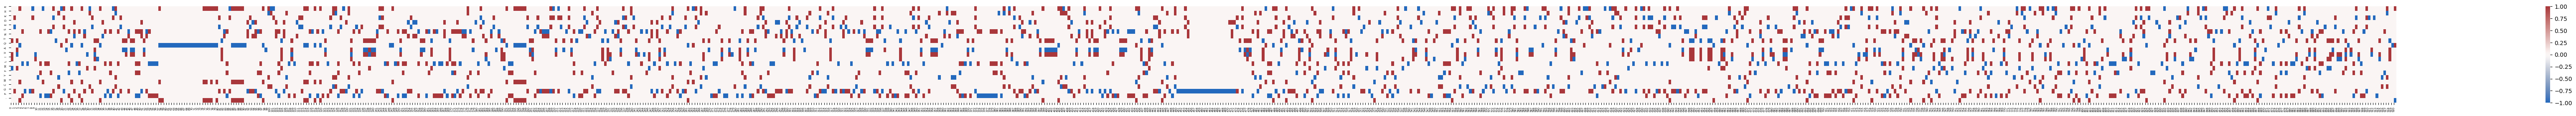

In [11]:
# More complete version
guides = design_library(
    gene_filepath    = f"{sgrna_dir}230408_AR_Input.fasta", 
    cas_type         = "SpG", 
    edit_from_list   = ["A", "C", "AC"], 
    edit_to_list     = ["G", "T", "GT"],
    # optional inputs
    genome_file      = f"{sgrna_dir}hg38_short.fa", # truncated version of hg38 reference genome sequence
    delete           = True,
    protein_filepath = f"{sgrna_dir}P10275.fasta", 
    exclude_introns  = False, exclude_nonediting = False,
    )
print(guides.columns)
guides.head(5)

## be_scan.analysis Function Calls

Sample sheet is set up like this: 

| sample_id | fastq_file       | condition  | agg_conditions | counts_file  | noncounts_file  | stats_file  |
| --------- | ----------       | ---------  | -------------- | -----------  | --------------  | ----------  |
| 0         | control.fastq.gz | t0         | t0             | counts-1.csv | noncounts-1.csv | stats-1.txt |
| 1         | cond_A1.fastq.gz | unsorted-1 | unsorted       | counts-2.csv | noncounts-2.csv | stats-2.txt |
| 2         | cond_A2.fastq.gz | unsorted-2 | unsorted       | counts-3.csv | noncounts-3.csv | stats-3.txt |
| 3         | cond_A3.fastq.gz | unsorted-3 | unsorted       | counts-4.csv | noncounts-4.csv | stats-4.txt |
| 4         | cond_B1.fastq.gz | sorted-1   | sorted         | counts-5.csv | noncounts-5.csv | stats-5.txt |
| 5         | cond_B2.fastq.gz | sorted-2   | sorted         | counts-6.csv | noncounts-6.csv | stats-6.txt |
| 6         | cond_B3.fastq.gz | sorted-3   | sorted         | counts-7.csv | noncounts-7.csv | stats-7.txt |

Comparisons sheet is set up like this: 

| name | treatment | control |
| ---- | --------- | ------- |
| sorted-unsorted | sorted | unsorted |

The names for treatment and control in the comparison sheet should correspond to the agg_conditions in the sample sheet

In [4]:
from be_scan.analysis import *
analysis_dir = "../../../tests/test_data/analysis/"

### Function 1: be_scan.analysis.count_reads()

In [16]:
count_reads(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    in_dir        = analysis_dir, 
    KEY_INTERVAL = (0,35), KEY = "ABCDEF", KEY_REV = "GHIJKL", 
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads output to library_counts.csv
Count reads completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86


### Function 2: be_scan.analysis.log_transform()

In [19]:
log_transform(
    sample_sheet   = f"{analysis_dir}sample_sheet.csv",
    library_counts = f"library_counts.csv", 
    controls = ["t0"], 
)

merge_and_norm output to library_LFC.csv
Merge and normalize completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.042458,0.110884,17.973953,0.042378,18.072172,0.140598,0.097953,0.050370
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.404624,-6.526951,12.358196,-5.573378,-10.010634,6.876285
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,0.000000,0.0,0.000000,17.919602,17.919602,17.927659,17.927659,18.001783,18.001783,17.949681,0.045301
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.404358,12.404358,13.358059,13.358059,8.587472,7.452241
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,17.919602,-0.011973,17.927659,-0.003915,17.750245,-0.181329,-0.065739,0.100185
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,17.837140,-0.094434,17.847041,-0.084533,17.784193,-0.147382,-0.108783,0.033792


### Function 3: be_scan.analysis.compare_conds()

In [20]:
be_scan.analysis.compare_conds(
    avg_conds     = f"library_LFC.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
)

compare_conds outputed to conditions.csv
Compare conditions completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.042458,0.110884,17.973953,0.042378,18.072172,0.140598,0.097953,0.050370,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.404624,-6.526951,12.358196,-5.573378,-10.010634,6.876285,0.0
2,CCCCCCCCCCCCCCCCCCCC,gene,0,90,92,100,0.0,0.000000,0.0,0.000000,17.919602,17.919602,17.927659,17.927659,18.001783,18.001783,17.949681,0.045301,0.0
3,DDDDDDDDDDDDDDDDDDDD,gene,0,0,2,4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,12.404358,12.404358,13.358059,13.358059,8.587472,7.452241,0.0
4,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,17.919602,-0.011973,17.927659,-0.003915,17.750245,-0.181329,-0.065739,0.100185,0.0
5,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,17.837140,-0.094434,17.847041,-0.084533,17.784193,-0.147382,-0.108783,0.033792,0.0


### Function 4: be_scan.analysis.calc_controls()

In [22]:
be_scan.analysis.calc_controls(
    conditions          = f"conditions.csv", 
    stats_comparisons   = ['cond1'], 
    neg_ctrl_col        = 'gene', 
    neg_ctrl_conditions = ['control'], 
    )

calc_controls outputed to stats.txt
Calculating controls completed


### Function 1-4: be_scan.analysis.batch_process()

In [5]:
batch_process(
    sample_sheet  = f"{analysis_dir}sample_sheet.csv", 
    annotated_lib = f"{analysis_dir}annotated_lib_sample_in.csv", 
    comparisons   = f"{analysis_dir}comparisons.csv", 
    file_dir     = analysis_dir, 

    # optional, typically you can leave these out since these are the dummy sequences I used to not include any real data
    KEY_INTERVAL = (0,35), KEY = "ABCDEF", KEY_REV = "GHIJKL", controls = ["t0"], return_df = True, 
    neg_ctrl_col = 'gene', neg_ctrl_conditions = ['control'], stats_comparisons = ['cond1'], 
    lower_cutoff=50, lower_cutoff_cols=['t0'], 
)

../../../tests/test_data/analysis/dummy1.fastq processed
../../../tests/test_data/analysis/dummy2.fastq processed
../../../tests/test_data/analysis/dummy3.fastq processed
../../../tests/test_data/analysis/dummy4.fastq processed
count_reads output to ../../../tests/test_data/analysis/counts_library.csv
Count reads completed
merge_and_norm output to ../../../tests/test_data/analysis/library_LFC.csv
Merge and normalize completed
compare_conds outputed to ../../../tests/test_data/analysis/conditions.csv
Compare conditions completed
calc_controls outputed to ../../../tests/test_data/analysis/stats.txt
For comparison cond1_LFCminusControl_avg

Mean is 0.3444583488557236

Standard deviation is 0.030436914973120798

Mean +- 2 standard deviations 0.40533217880196515 0.283584518909482

Calculating controls completed


,sgRNA_seq,gene,t0,counts2,counts3,counts4,control_avg,control_avg_LFC,control_avg_LFCminusControl,t0_LFC,counts2_LFC,counts2_LFCminusControl,counts3_LFC,counts3_LFCminusControl,counts4_LFC,counts4_LFCminusControl,cond1_LFCminusControl_avg,cond1_LFCminusControl_stdev,cond1-cond1
0,AAAAAAAAAAAAAAAAAAAA,gene,100,98,95,105,100.0,17.931574,0.0,17.931574,18.453525,0.521951,18.398141,0.466566,18.532076,0.600501,0.529673,0.067301,0.0
1,BBBBBBBBBBBBBBBBBBBB,gene,100,0,1,2,100.0,17.931574,0.0,17.931574,0.000000,-17.931574,11.828677,-6.102897,12.818026,-5.113548,-9.716006,7.132066,0.0
2,EEEEEEEEEEEEEEEEEEEE,control,100,90,92,84,100.0,17.931574,0.0,17.931574,18.330669,0.399095,18.351847,0.420273,18.210149,0.278574,0.365980,0.076433,0.0
3,FFFFFFFFFFFFFFFFFFFF,control,100,85,87,86,100.0,17.931574,0.0,17.931574,18.248207,0.316633,18.271229,0.339654,18.244096,0.312521,0.322936,0.014624,0.0


## be_scan.plot Function Calls

Starting from Nick's DNMT3A data in the .csv format and generating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

In [3]:
from be_scan.plot import *
import pandas as pd
plot_file = '../../../tests/test_data/plot/NZL10196_v9_comparisons.csv'

### Function 1: be_scan.plot.scatterplot()

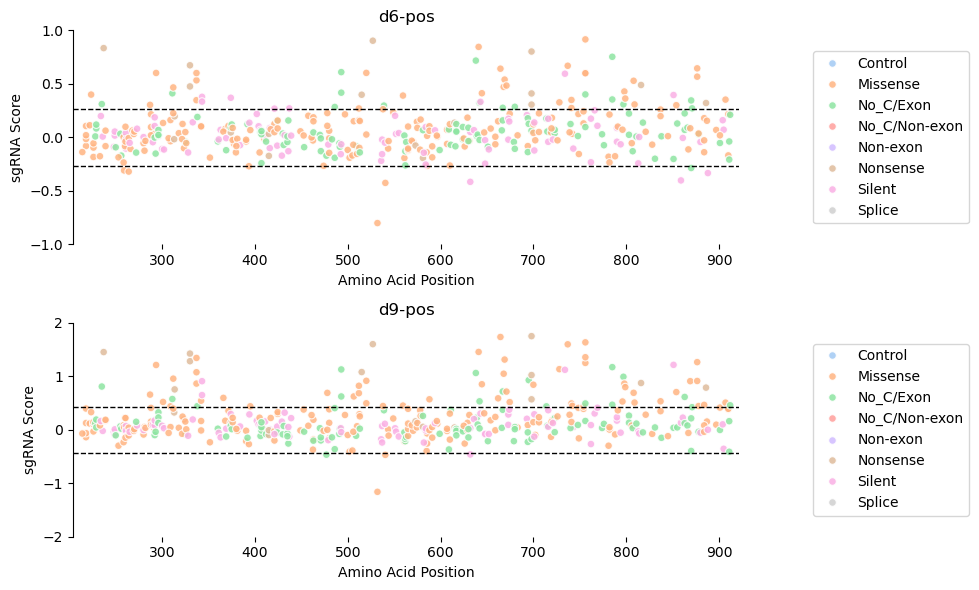

In [4]:
be_scan.plot.scatterplot(
    df_filepath  = plot_file,            # data
    x_column     = 'Edit_site_3A1',      # name of a column in data
    comparisons  = ['d6-pos', 'd9-pos'], # names of a column in data, each is a graph

    # optional
    include_hue=True, hue_col='Mut_type', # color settings
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control lines
    savefig = False, xwindow=[200, 920]
    )

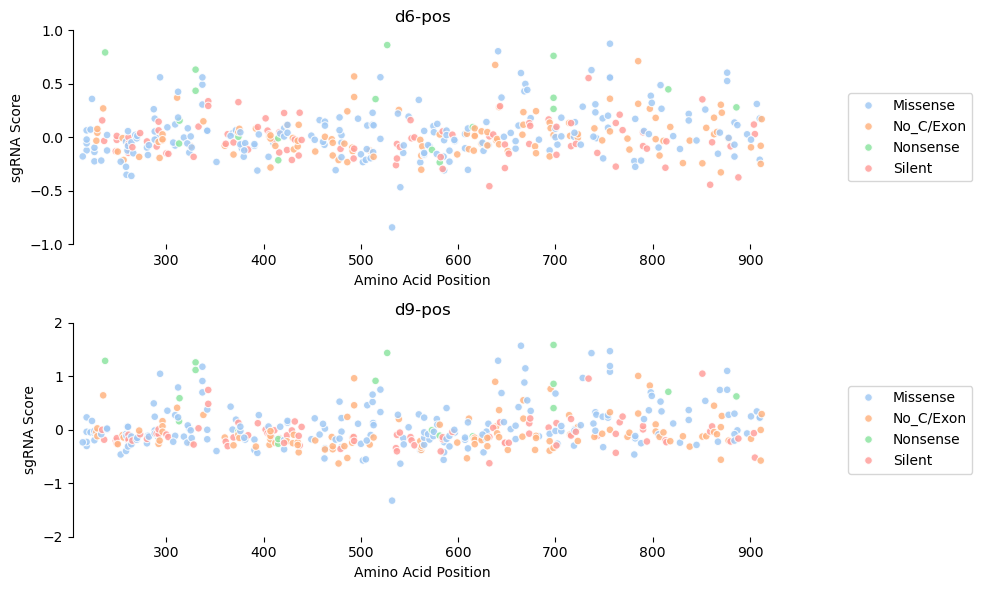

In [5]:
temp_df = pd.read_csv(plot_file)
temp_df = temp_df[temp_df['Edit_site_3A1'] > 0.0]
temp_df.to_csv('temp.csv')

be_scan.plot.scatterplot(
    df_filepath  = 'temp.csv',           # data
    x_column     = 'Edit_site_3A1',      # name of a column in data
    comparisons  = ['d6-pos', 'd9-pos'], # names of a column in data, each is a graph

    # optional
    include_hue=True, hue_col='Mut_type', # color settings
    savefig = False, 
    )

In [6]:
be_scan.plot.interactive_scatter(
    df_filepath  = plot_file,            # data
    x_column     = 'Edit_site_3A1',      # name of a column in data
    comparisons  = ['d6-pos'], # names of a column in data, each is a graph

    # optional
    include_hue=True, hue_col='Mut_type', # color settings
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], # negative control lines
    savefig = False, xwindow=[200, 920], annot_label='Mut_list_all'
    )

### Function 2: be_scan.plot.corr_heatmap()

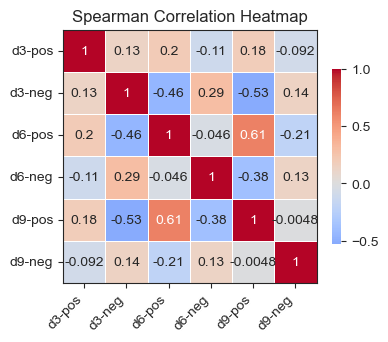

In [7]:
be_scan.plot.corr_heatmap(
    df_filepath = plot_file, # data
    comparisons = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], # names of columns in data
    savefig     = False,
    )

In [8]:
be_scan.plot.interactive_corr_heatmap(
    df_filepath = plot_file, # data
    comparisons = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], # names of columns in data
    savefig     = False,
    )

### Function 3: be_scan.plot.corr_jointplot()

R: -0.7088480332812986 (p-value 2.6007890349625913e-112)
R2: 0.5024655342867651


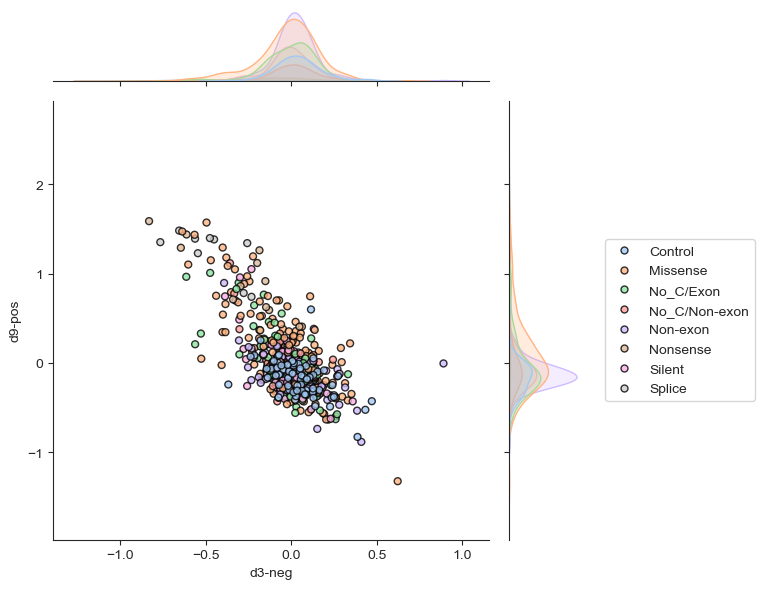

In [9]:
be_scan.plot.corr_jointplot(
    df_filepath = plot_file, condition1 = 'd3-neg', condition2 = 'd9-pos', # names of columns in data
    include_hue = True, hue_col = 'Mut_type',  # name of a column in data
    savefig = False,
    )

In [10]:
be_scan.plot.interactive_corr_jointplot(
    df_filepath = plot_file, condition1 = 'd3-neg', condition2 = 'd9-pos', # names of columns in data
    include_hue = True, hue_col = 'Mut_type',  # name of a column in data
    savefig = False,
    )

### Function 4: be_scan.plot.boxplot()

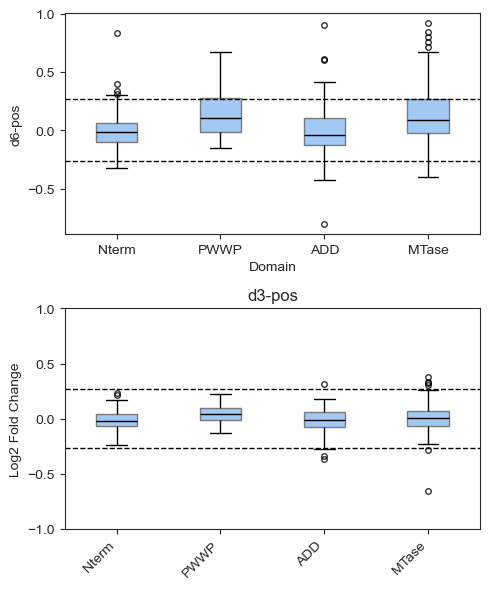

In [11]:
be_scan.plot.boxplot(
    df_filepath  = plot_file, # data
    comparisons  = ['d6-pos', 'd3-pos'],  # name of a column in data, each column is a graph
    plot_column = 'Domain', plot_conditions = ['PWWP', 'ADD', 'MTase', 'Nterm'], # how to split up boxes in graph

    # optional
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], 
    savefig = False, 
)

In [12]:
be_scan.plot.interactive_boxplot(
    df_filepath  = plot_file, # data
    comparisons  = ['d6-pos', 'd3-pos'],  # name of a column in data, each column is a graph
    plot_column = 'Domain', plot_conditions = ['PWWP', 'ADD', 'MTase', 'Nterm'], # how to split up boxes in graph

    # optional
    neg_ctrl=True, neg_ctrl_col='Gene', neg_ctrl_conditions=['NON-GENE'], 
    savefig = False, 
)

### Function 5: be_scan.plot.sgrna_enrichment()

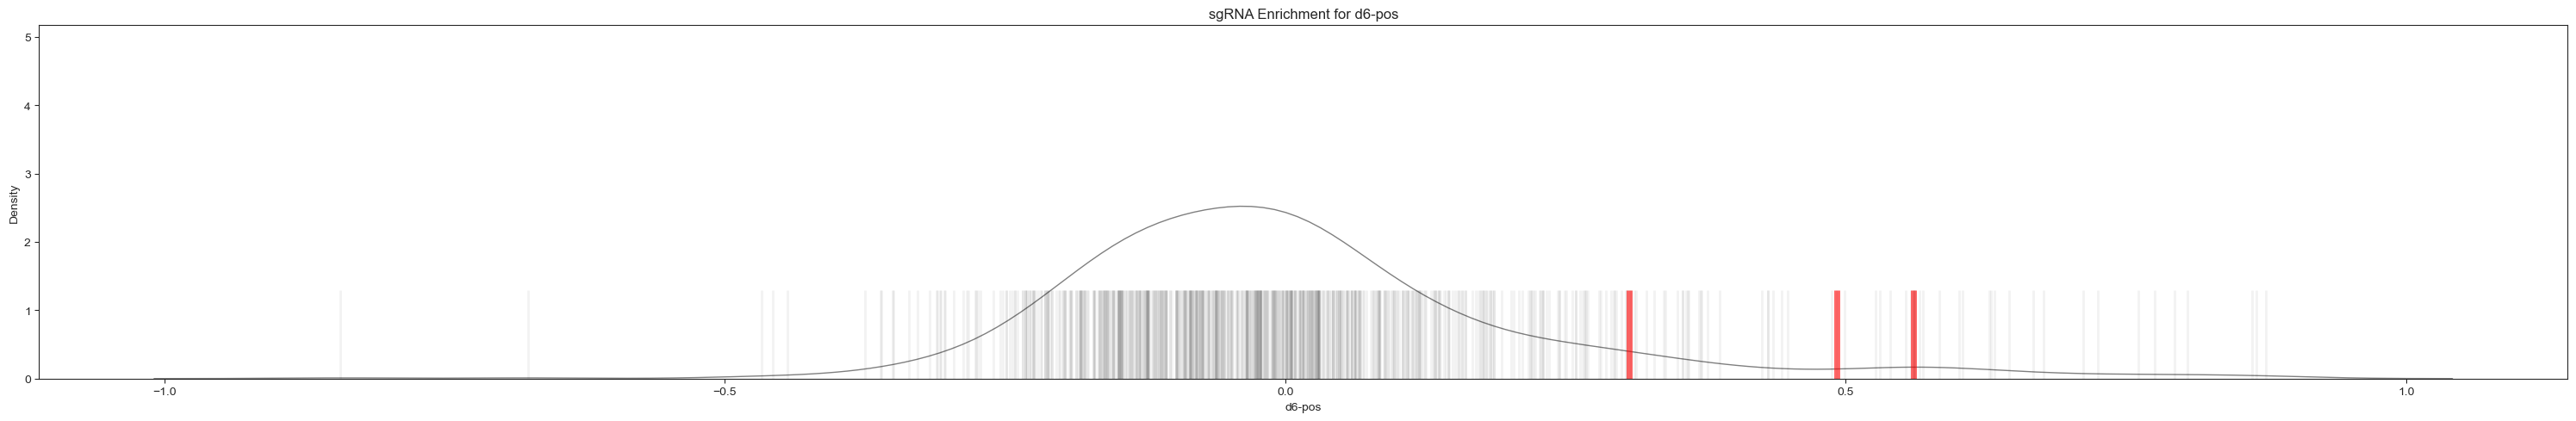

In [16]:
be_scan.plot.sgrna_enrichment(
    df_filepath  = plot_file, # data
    comparisons  = ['d6-pos'],  # name of a column in data, each column is a graph
    highlight=True, highlight_col='sgRNA_ID', 
    highlight_vals=['DNMT3A2_149', 'DNMT3A2_150', 'DNMT3A2_151'], 
    savefig = False, 
)

### Function 6: be_scan.plot.loess_smoothing()

Takes about 2 minutes to run for n_repeats=10,000

In [17]:
temp_df = pd.read_csv(plot_file)
temp_df = temp_df[temp_df['Edit_site_3A1'] > 0.0]
temp_df = temp_df[temp_df['Mut_type'] == 'Missense']
temp_df.to_csv('temp.csv')

d3-pos : ['124-130']
d6-pos : ['432-460', '526-554']


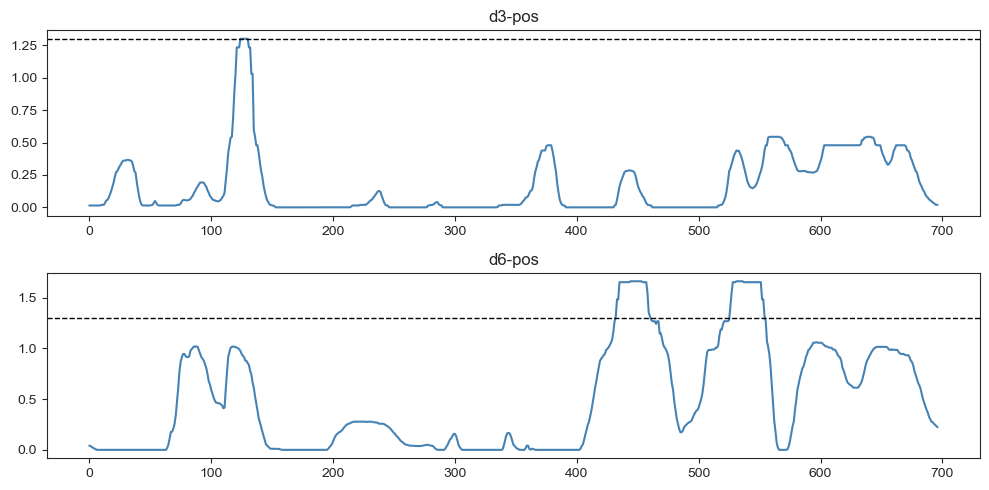

In [18]:
loess_smoothing(
    df_filepath  = 'temp.csv', # data
    x_column     = 'Edit_site',  
    comparisons  = ['d3-pos', 'd6-pos'], 
    span         = 0.08, # 8% amino acid window
    n_repeats    = 2000, 
    savefig = False, return_df=False, 
)

d3-pos : ['114-136']
d6-pos : ['105-136', '440-474', '482-494', '509-559', '579-591']


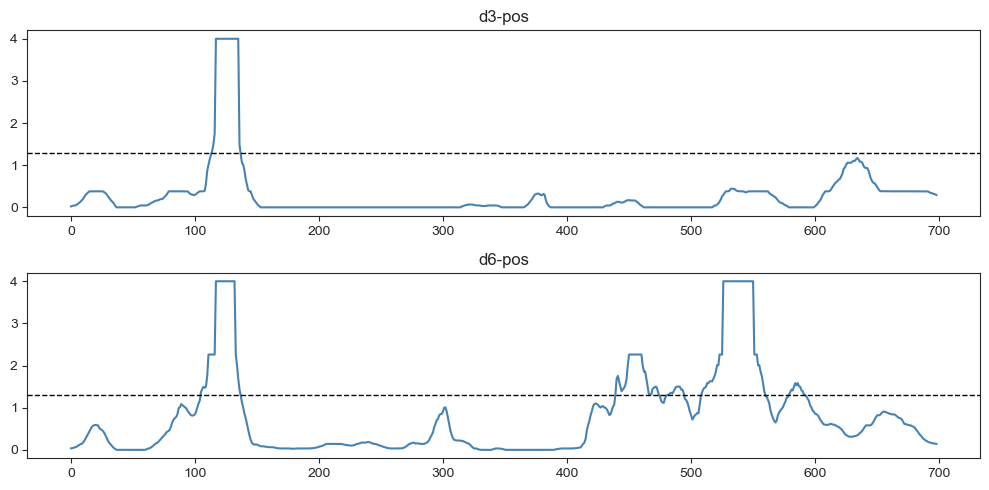

In [14]:
loess_smoothing(
    df_filepath  = 'temp.csv', # data
    x_column     = 'Edit_site',  
    comparisons  = ['d3-pos', 'd6-pos'], 
    span         = 50, # 50 amino acid window
    n_repeats    = 2000, 
    savefig = False, return_df=False, 
)